In [1]:
# COMP-551 Mini-Project #1.
# Task 3: Written by Ryan Wilson.

# Data in 'finalNormalTotal_NEW' previously cleaned (Task 1: Dean Meluban).
# Encoding = UTF-8.

# Import pandas, numpy and matplotlib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing & classifier modules from scikit-learn.
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

# Import summary stats module from scipy.
from scipy import stats

# Read data from file 'finalNormalTotal_NEW'.
# Data file stored in same directory as python process.
data = pd.read_csv('finalNormalTotal_NEW.csv')

# Set up print options (formatting) for np arrays (can adjust sig digits).
np.set_printoptions(formatter={'float': '{:0.4f}'.format})

# Preview the data to ensure proper import.
print()
print(data)
print()

# Display data information summary.
data.info()
print()



    country_region sub_region_1        date  Adrenal crisis   Ageusia  \
0    United States       Alaska  2020-03-23        0.242395  1.000000   
1    United States       Alaska  2020-03-30        0.134936  0.282752   
2    United States       Alaska  2020-04-06        0.189892  0.131008   
3    United States       Alaska  2020-04-13        0.001472       NaN   
4    United States       Alaska  2020-04-20        0.058391       NaN   
..             ...          ...         ...             ...       ...   
125  United States      Wyoming  2020-09-07        0.029605  0.210046   
126  United States      Wyoming  2020-09-14        0.066729  0.602740   
127  United States      Wyoming  2020-09-21        0.136748  0.305936   
128  United States      Wyoming  2020-09-28        0.331767  0.504566   
129  United States      Wyoming  2020-10-05        0.034305  1.000000   

     Allergic conjunctivitis  Amenorrhea  Angular cheilitis   Anosmia  \
0                        NaN    0.190876         

In [2]:
# Group data & split into region-based dataframes.
grouped_data = data.groupby(data['sub_region_1'])

grouped_Alaska = grouped_data.get_group('Alaska')
minus_Alaska = data[data.sub_region_1 != 'Alaska']

grouped_Montana = grouped_data.get_group('Montana')
minus_Montana = data[data.sub_region_1 != 'Montana']

grouped_NDakota = grouped_data.get_group('North Dakota')
minus_NDakota = data[data.sub_region_1 != 'North Dakota']

grouped_SDakota = grouped_data.get_group('South Dakota')
minus_SDakota = data[data.sub_region_1 != 'South Dakota']

grouped_Vermont = grouped_data.get_group('Vermont')
minus_Vermont = data[data.sub_region_1 != 'Vermont']

grouped_Wyoming = grouped_data.get_group('Wyoming')
minus_Wyoming = data[data.sub_region_1 != 'Wyoming']

# Group data & split into time-based dataframes (c/o 2020-08-10).
grouped_data2 = data.groupby(data['date'])

pre_cutoff = data[data.date <= '2020-08-10']
post_cutoff = data[data.date > '2020-08-10']

In [3]:
# Split into respective region- & time-based training and test sets.
X_train1, y_train1 = minus_Alaska.iloc[:, 3:103], minus_Alaska.iloc[:, 103]
X_train1, y_train1 = X_train1.fillna(X_train1.mean()), y_train1.fillna(y_train1.mean()).astype(int)
X_test1, y_test1 = grouped_Alaska.iloc[:, 3:103], grouped_Alaska.iloc[:, 103]
X_test1, y_test1 = X_test1.fillna(X_test1.mean()), y_test1.fillna(y_test1.mean()).astype(int)

X_train2, y_train2 = minus_Montana.iloc[:, 3:103], minus_Montana.iloc[:, 103]
X_train2, y_train2 = X_train2.fillna(X_train2.mean()), y_train2.fillna(y_train2.mean()).astype(int)
X_test2, y_test2 = grouped_Montana.iloc[:, 3:103], grouped_Montana.iloc[:, 103]
X_test2, y_test2 = X_test2.fillna(X_test2.mean()), y_test2.fillna(y_test2.mean()).astype(int)

X_train3, y_train3 = minus_NDakota.iloc[:, 3:103], minus_NDakota.iloc[:, 103]
X_train3, y_train3 = X_train3.fillna(X_train3.mean()), y_train3.fillna(y_train3.mean()).astype(int)
X_test3, y_test3 = grouped_NDakota.iloc[:, 3:103], grouped_NDakota.iloc[:, 103]
X_test3, y_test3 = X_test3.fillna(X_test3.mean()), y_test3.fillna(y_test3.mean()).astype(int)

X_train4, y_train4 = minus_SDakota.iloc[:, 3:103], minus_SDakota.iloc[:, 103]
X_train4, y_train4 = X_train4.fillna(X_train4.mean()), y_train4.fillna(y_train4.mean()).astype(int)
X_test4, y_test4 = grouped_SDakota.iloc[:, 3:103], grouped_SDakota.iloc[:, 103]
X_test4, y_test4 = X_test4.fillna(X_test4.mean()), y_test4.fillna(y_test4.mean()).astype(int)

X_train5, y_train5 = minus_Vermont.iloc[:, 3:103], minus_Vermont.iloc[:, 103]
X_train5, y_train5 = X_train5.fillna(X_train5.mean()), y_train5.fillna(y_train5.mean()).astype(int)
X_test5, y_test5 = grouped_Vermont.iloc[:, 3:103], grouped_Vermont.iloc[:, 103]
X_test5, y_test5 = X_test5.fillna(X_test5.mean()), y_test5.fillna(y_test5.mean()).astype(int)

X_train6, y_train6 = minus_Wyoming.iloc[:, 3:103], minus_Wyoming.iloc[:, 103]
X_train6, y_train6 = X_train6.fillna(X_train6.mean()), y_train6.fillna(y_train6.mean()).astype(int)
X_test6, y_test6 = grouped_Wyoming.iloc[:, 3:103], grouped_Wyoming.iloc[:, 103]
X_test6, y_test6 = X_test6.fillna(X_test6.mean()), y_test6.fillna(y_test6.mean()).astype(int)

X_train_time, y_train_time = post_cutoff.iloc[:, 3:103], post_cutoff.iloc[:, 103]
X_train_time, y_train_time = X_train_time.fillna(X_train_time.mean()), y_train_time.fillna(y_train_time.mean()).astype(int)
X_test_time, y_test_time = pre_cutoff.iloc[:, 3:103], pre_cutoff.iloc[:, 103]
X_test_time, y_test_time = X_test_time.fillna(X_test_time.mean()), y_test_time.fillna(y_test_time.mean()).astype(int)

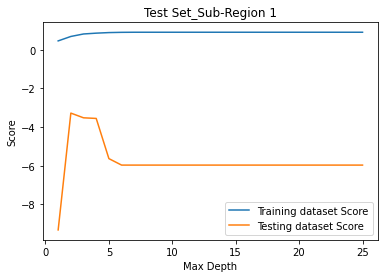

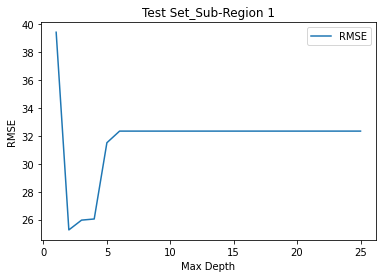

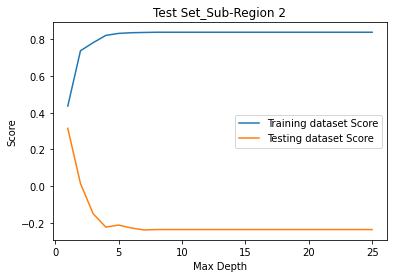

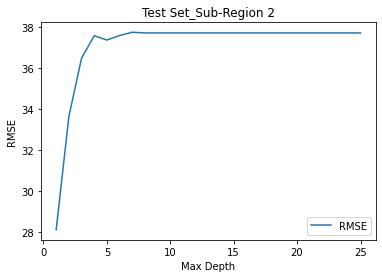

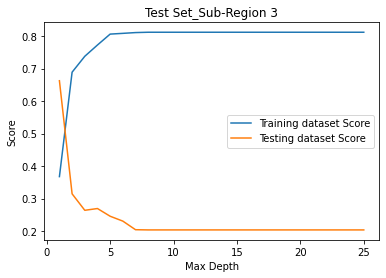

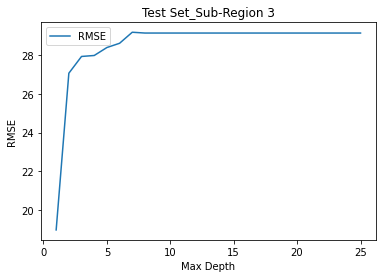

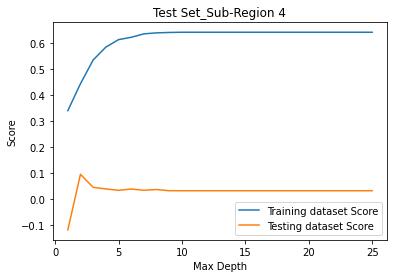

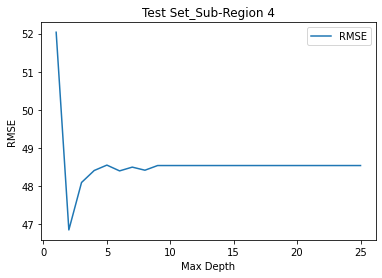

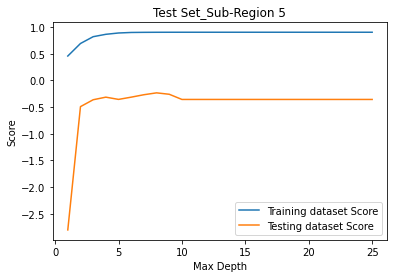

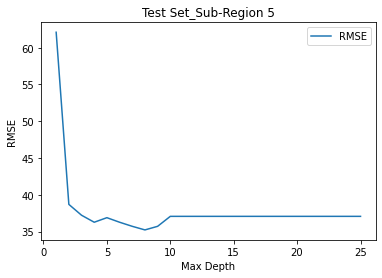

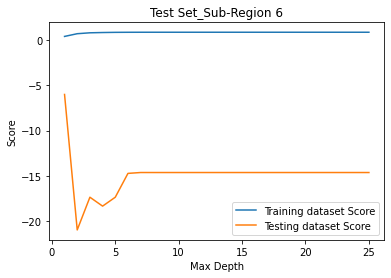

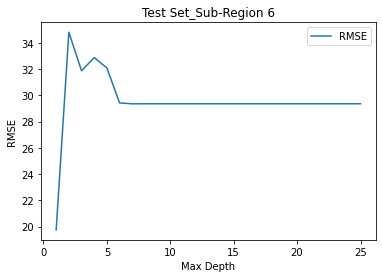

In [4]:
# Initialize arrays to pull data for future calculations.
maxDepth = np.arange(1, 26)
nfolds = 6

train_score = []
test_score = []
RMSE = []

for a in range(0, nfolds):
    train_score2 = []
    train_score.append(train_score2)

for b in range(0, nfolds):
    test_score2 = []
    test_score.append(test_score2)

for c in range(0, nfolds):
    RMSE2 = []
    RMSE.append(RMSE2)

# Fit & train DTREE model on 6-fold region-based strategy.
for i in range(1, nfolds+1):
    X_train = globals()[f"X_train{i}"]
    X_test = globals()[f"X_test{i}"]
    y_train = globals()[f"y_train{i}"]
    y_test = globals()[f"y_test{i}"]

    # Loop over 'maxDepth' values.
    for j, k in enumerate(maxDepth):
        dtree = DecisionTreeRegressor(max_depth=k, criterion='mse', min_samples_split=10, min_samples_leaf=5, random_state=42)
        dtree.fit(X_train, y_train.values.reshape(-1))
        y_hat = dtree.predict(X_test).astype(int)

        # Compute & store training and test data scores.
        train_score_temp = dtree.score(X_train, y_train)
        train_score[i-1].append(train_score_temp)

        test_score_temp = dtree.score(X_test, y_test)
        test_score[i-1].append(test_score_temp)

        # Compute & store RMSE (root mean squared error) values.
        RMSE_temp = np.sqrt(mean_squared_error(y_test, y_hat))
        RMSE[i-1].append(RMSE_temp)

        """
        plt.scatter(y_test, y_hat, c='b', marker='o')
        plt.title(f"Cross-Validation Set {i}, K-Neighbors={k}")
        plt.xlabel(f"y_test")
        plt.ylabel(f"y_hat")
        plt.legend(loc='lower left')
        plt.show()
        
        print(f"Predicted Hospitalizations (Test Set {i}):")
        print(y_hat)
        print()

        # Calculate model classification statistics.
        c_matrix = confusion_matrix(y_test, y_hat)
        print(f"Confusion Matrix (Test Set {i}):")
        print(c_matrix)
        print()

        y_true, y_pred = y_test, dtree.predict(X_test)
        print(f"Classification Report (Test Set {i}):")
        print(classification_report(y_true, y_pred))"""

    # Generate plots to evaluate appropriate 'maxDepth' hyperparameter.
    plt.plot(maxDepth, train_score[i-1], label = 'Training dataset Score')
    plt.plot(maxDepth, test_score[i-1], label = 'Testing dataset Score')
    plt.legend()
    plt.title(f"Test Set_Sub-Region {i}")
    plt.xlabel('Max Depth')
    plt.ylabel('Score')
    plt.show()

    plt.plot(maxDepth, RMSE[i-1], label = 'RMSE')
    plt.legend()
    plt.title(f"Test Set_Sub-Region {i}")
    plt.xlabel('Max Depth')
    plt.ylabel('RMSE')
    plt.show()

# Zip train/test accuracies & RMSE to maxDepth arrays.
maxDepth_train_score = list(map(list, zip(*train_score)))
maxDepth_test_score = list(map(list, zip(*test_score)))
maxDepth_RMSE = list(map(list, zip(*RMSE)))

# Initialize arrays to store maxDepth-hyperparameter metrics.
mean_maxDepth_train_score = []
mean_maxDepth_test_score = []
mean_maxDepth_RMSE = []

# Compute metrics based on each maxDepth-hyperparameter.
for m in range(0, 25):
    mean_maxDepth_train_score_temp = np.mean(maxDepth_train_score[m])
    mean_maxDepth_train_score.append(mean_maxDepth_train_score_temp)

    mean_maxDepth_test_score_temp = np.mean(maxDepth_test_score[m])
    mean_maxDepth_test_score.append(mean_maxDepth_test_score_temp)

    mean_maxDepth_RMSE_temp = np.mean(maxDepth_RMSE[m])
    mean_maxDepth_RMSE.append(mean_maxDepth_RMSE_temp)

In [5]:
# Print region-based summary tables (training/testing scores & RMSE).
train_score_table = pd.DataFrame(train_score)
train_score_table.loc['Mean (Depth)'] = train_score_table.mean()
train_score_table['Mean (nFold)'] = train_score_table.mean(numeric_only=True, axis=1)
print("Table: Training Scores (Region-Based):")
print(train_score_table)
print()

test_score_table = pd.DataFrame(test_score)
test_score_table.loc['Mean (Depth)'] = test_score_table.mean()
test_score_table['Mean (nFold)'] = test_score_table.mean(numeric_only=True, axis=1)
print("Table: Testing Scores (Region-Based):")
print(test_score_table)
print()

RMSE_table = pd.DataFrame(RMSE)
RMSE_table.loc['Mean (Depth)'] = RMSE_table.mean()
RMSE_table['Mean (nFold)'] = RMSE_table.mean(numeric_only=True, axis=1)
print("Table: RMSE (Region-Based):")
print(RMSE_table)
print()

train_score_table.to_csv('DTREE_train_score_table.csv')
test_score_table.to_csv('DTREE_test_score_table.csv')
RMSE_table.to_csv('DTREE_RMSE_table.csv')

Table: Training Scores (Region-Based):
                     0         1         2         3         4         5  \
0             0.459642  0.689029  0.817675  0.859932  0.889613  0.902487   
1             0.435985  0.736456  0.780431  0.819937  0.830715  0.834474   
2             0.367632  0.688927  0.737818  0.772540  0.806110  0.808402   
3             0.340737  0.444555  0.535717  0.585098  0.613890  0.622849   
4             0.455850  0.690721  0.818173  0.862867  0.887549  0.897442   
5             0.411664  0.712203  0.812334  0.843179  0.862837  0.870528   
Mean (Depth)  0.411918  0.660315  0.750358  0.790592  0.815119  0.822697   

                     6         7         8         9  ...        16        17  \
0             0.907076  0.907076  0.907076  0.907076  ...  0.907076  0.907076   
1             0.835912  0.837073  0.837073  0.837073  ...  0.837073  0.837073   
2             0.810800  0.811826  0.811826  0.811826  ...  0.811826  0.811826   
3             0.636069  0.63

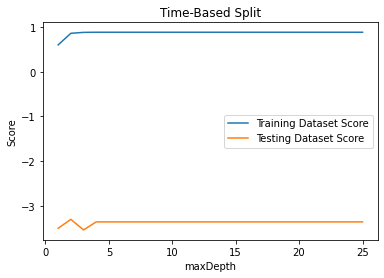

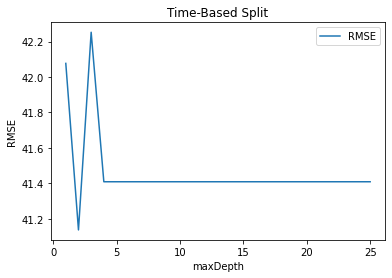

In [6]:
# Fit & train DTREE model on time-based (2020-08-10) strategy.
train_score_time = []
test_score_time = []
RMSE_time = []

# Loop over 'maxDepth' values.
for n, k in enumerate(maxDepth):
    dtree = DecisionTreeRegressor(max_depth=k, criterion='mse', min_samples_split=10, min_samples_leaf=5, random_state=42)
    dtree.fit(X_train_time, y_train_time.values.reshape(-1))
    y_hat = dtree.predict(X_test_time)

    # Compute & store training and test data scores.
    train_score_temp = dtree.score(X_train_time, y_train_time)
    train_score_time.append(train_score_temp)
    test_score_temp = dtree.score(X_test_time, y_test_time)
    test_score_time.append(test_score_temp)

    # Compute & store RMSE (root mean squared error) values.
    RMSE_temp = np.sqrt(mean_squared_error(y_test_time, y_hat))
    RMSE_time.append(RMSE_temp)

    """
    plt.scatter(y_test_time, y_hat, c='b', marker='o')
    plt.title(f"Cross-Validation Set 1, K-Neighbors={k}")
    plt.xlabel(f"y_test")
    plt.ylabel(f"y_hat")
    plt.legend(loc='lower left')
    plt.show()

    print(f"Predicted Hospitalizations (Test Set 1):")
    print(y_hat)
    print()

    # Calculate model classification statistics.
    c_matrix = confusion_matrix(y_test_time, y_hat)
    print(f"Confusion Matrix (Test Set 1):")
    print(c_matrix)
    print()

    y_true, y_pred = y_test_time, dtree.predict(X_test_time)
    print(f"Classification Report (Test Set 1):")
    print(classification_report(y_true, y_pred))"""

# Generate plots to evaluate appropriate 'maxDepth' hyperparameter.
plt.plot(maxDepth, train_score_time, label = 'Training Dataset Score')
plt.plot(maxDepth, test_score_time, label = 'Testing Dataset Score')
plt.legend()
plt.title(f"Time-Based Split")
plt.xlabel('maxDepth')
plt.ylabel('Score')
plt.show()

plt.plot(maxDepth, RMSE_time, label = 'RMSE')
plt.legend()
plt.title(f"Time-Based Split")
plt.xlabel('maxDepth')
plt.ylabel('RMSE')
plt.show()

In [7]:
# Print time-based summary tables (training/testing scores & RMSE).
summary_time_table = pd.DataFrame(train_score_time, columns=['Train'])
summary_time_table['Test'] = test_score_time
summary_time_table['RMSE'] = RMSE_time
summary_time_table.loc['Mean (Depth)'] = summary_time_table.mean()
print("Table: Train/Test Scores & RMSE (Time-Based):")
print(summary_time_table)
print()

summary_time_table.to_csv('DTREE_summary_time_table.csv')

Table: Train/Test Scores & RMSE (Time-Based):
                 Train      Test       RMSE
0             0.601766 -3.501410  42.076950
1             0.861026 -3.302655  41.137531
2             0.881814 -3.539101  42.252738
3             0.884685 -3.359688  41.409276
4             0.884685 -3.359688  41.409276
5             0.884685 -3.359688  41.409276
6             0.884685 -3.359688  41.409276
7             0.884685 -3.359688  41.409276
8             0.884685 -3.359688  41.409276
9             0.884685 -3.359688  41.409276
10            0.884685 -3.359688  41.409276
11            0.884685 -3.359688  41.409276
12            0.884685 -3.359688  41.409276
13            0.884685 -3.359688  41.409276
14            0.884685 -3.359688  41.409276
15            0.884685 -3.359688  41.409276
16            0.884685 -3.359688  41.409276
17            0.884685 -3.359688  41.409276
18            0.884685 -3.359688  41.409276
19            0.884685 -3.359688  41.409276
20            0.884685 -3.3596